# Observations timeseries demo

In this notebook we use the backend API to retrieve a time series with observations data and then plot it.

In [1]:
%matplotlib widget

import httpx
import matplotlib.pyplot as plt
import pandas as pd

station_code = "91"
variable_name = "TDd"
month = 1
api_url = f"http://webapp:5001/api/v2/observations/time-series/{station_code}/{variable_name}/{month}"


def _parse_to_dataframe(time_series: dict):
    df = pd.DataFrame.from_records(time_series["values"])
    df["datetime"] = pd.to_datetime(df["datetime"])
    df.set_index("datetime", inplace=True)
    return df    

In [42]:
query_params = {
   "datetime": "../..",
    "include_decade_data": True,
    "smoothing": [
        "NO_SMOOTHING",
        "MOVING_AVERAGE_5_YEARS",
    ],
    "include_mann_kendall_trend": True,
    "mann_kendall_start_year": 1995,
    # "mann_kendall_end_year": 2008, 
}


raw_response = httpx.get(
    api_url,
    params=query_params
)
try:
    raw_response.raise_for_status()
except httpx.HTTPStatusError as err:
    print(raw_response.content)
    raise

raw_series = raw_response.json()["series"]

series = {s["name"]: s for s in raw_series}

dfs =  {}
for series in raw_series:
    name = " - ".join((
        series["translations"]["parameter_values"]["series_name"]["it"],
        series["translations"]["parameter_values"]["processing_method"]["it"]
    ))
    dfs[name] = _parse_to_dataframe(series)

In [43]:
[s["info"] for s in raw_series]

[{'processing_method': 'NO_SMOOTHING',
  'variable': 'TDd',
  'series_elaboration': 'ORIGINAL',
  'derived_series': ''},
 {'processing_method': 'MOVING_AVERAGE_5_YEARS',
  'variable': 'TDd',
  'series_elaboration': 'ORIGINAL',
  'derived_series': ''},
 {'processing_method': 'NO_SMOOTHING',
  'variable': 'TDd',
  'series_elaboration': 'DERIVED',
  'derived_series': 'DECADE_SERIES'},
 {'processing_method': 'NO_SMOOTHING',
  'variable': 'TDd',
  'series_elaboration': 'DERIVED',
  'derived_series': 'MANN_KENDALL_SERIES',
  'mann-kendall': {'trend': 'no trend',
   'h': False,
   'p': 0.23187636614304052,
   'z': 1.1955393638947858,
   'tau': 0.15632183908045977,
   's': 68.0,
   'var_s': 3140.6666666666665,
   'slope': 0.03574074074074073,
   'intercept': -5.222240740740741}}]

In [40]:
[s["translations"] for s in raw_series]

[{'series_name': {'en': 'Mean temperature', 'it': 'Temperatura media'},
  'processing_method': {'en': 'no processing', 'it': 'nessuna elaborazione'},
  'parameter_names': {'processing_method': {'en': 'processing method',
    'it': 'processing method'},
   'variable': {'en': 'variable', 'it': 'variable'},
   'series_elaboration': {'en': 'series elaboration',
    'it': 'series elaboration'},
   'derived_series': {'en': 'derived series', 'it': 'derived series'}},
  'parameter_values': {'processing_method': {'en': 'no processing',
    'it': 'nessuna elaborazione'},
   'variable': {'en': 'Mean temperature', 'it': 'Temperatura media'},
   'series_elaboration': {'en': 'original', 'it': 'original'},
   'derived_series': {'en': '', 'it': ''}}},
 {'series_name': {'en': 'Mean temperature', 'it': 'Temperatura media'},
  'processing_method': {'en': 'centered 5-year moving average',
   'it': 'media mobile centrata a 5 anni'},
  'parameter_names': {'processing_method': {'en': 'processing method',
   

### Plotting

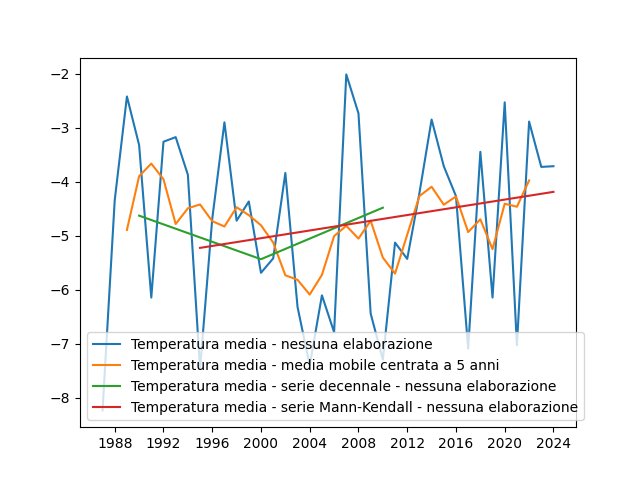

In [44]:
fig, ax = plt.subplots()

for name, df in dfs.items():
    ax.plot(df, label=name)


ax.legend()


In [16]:
ax.clear()

In [21]:
series["TDd__MANN_KENDALL"]["info"]

{'trend': 'no trend',
 'h': 0.0,
 'p': 0.2596563563704499,
 'z': 1.1272037239532693,
 'tau': 0.4666666666666667,
 's': 7.0,
 'var_s': 28.333333333333332,
 'slope': 1.076,
 'intercept': -8.8985}

In [25]:
dfs

{'TDd__DECADE_MEAN':                             value
 datetime                         
 1990-01-01 00:00:00+00:00 -4.6259
 2000-01-01 00:00:00+00:00 -5.4322
 2010-01-01 00:00:00+00:00 -4.4786,
 'TDd__MANN_KENDALL':                               value
 datetime                           
 1987-01-01 00:00:00+00:00 -4.487667
 1988-01-01 00:00:00+00:00 -4.480333
 1989-01-01 00:00:00+00:00 -4.473000
 1990-01-01 00:00:00+00:00 -4.465667
 1991-01-01 00:00:00+00:00 -4.458333
 1992-01-01 00:00:00+00:00 -4.451000
 1993-01-01 00:00:00+00:00 -4.443667
 1994-01-01 00:00:00+00:00 -4.436333
 1995-01-01 00:00:00+00:00 -4.429000
 1996-01-01 00:00:00+00:00 -4.421667
 1997-01-01 00:00:00+00:00 -4.414333
 1998-01-01 00:00:00+00:00 -4.407000
 1999-01-01 00:00:00+00:00 -4.399667
 2000-01-01 00:00:00+00:00 -4.392333
 2001-01-01 00:00:00+00:00 -4.385000
 2002-01-01 00:00:00+00:00 -4.377667
 2003-01-01 00:00:00+00:00 -4.370333
 2004-01-01 00:00:00+00:00 -4.363000
 2005-01-01 00:00:00+00:00 -4.355667
 2006-